<a href="https://colab.research.google.com/github/kenken0830/Graphing/blob/main/HR_VITON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title #**セットアップ**

# githubからコードをコピー
! git clone https://github.com/cedro3/HR-VITON.git
%cd HR-VITON

# ライブラリーのインストール
! pip install tensorboardX
! pip install torchgeometry

# 学習済みパラメータのダウンロード
import gdown
gdown.download('https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ', 'mtviton_step_100000.pth', quiet=False)
gdown.download('https://drive.google.com/uc?id=1BkSA8UJo-6eOkKcXTFOHK80Esc4vBmVC', 'gen_step_110000.pth', quiet=False)

# テストデータのダウンロード
gdown.download('https://drive.google.com/uc?id=1CcgCubhLc9iF6jGACdUgGhTDWMC7Gjzr', 'test.zip', quiet=False)
! unzip test.zip

# 関数のインポート
from function import *

# warning非表示
import warnings
warnings.filterwarnings("ignore")

# ダウンロードフォルダ作成
! mkdir download

Cloning into 'HR-VITON'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (109/109), 16.03 MiB | 1.57 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/HR-VITON
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 14.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.6 MB/s 


Downloading...
From: https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
To: /content/HR-VITON/mtviton_step_100000.pth
100%|██████████| 190M/190M [00:04<00:00, 39.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BkSA8UJo-6eOkKcXTFOHK80Esc4vBmVC
To: /content/HR-VITON/gen_step_110000.pth
100%|██████████| 402M/402M [00:06<00:00, 59.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CcgCubhLc9iF6jGACdUgGhTDWMC7Gjzr
To: /content/HR-VITON/test.zip
100%|██████████| 697M/697M [00:10<00:00, 64.9MB/s]


ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: test/test/image-parse-v3/07770_00.png  
  inflating: test/test/image-parse-v3/07772_00.png  
  inflating: test/test/image-parse-v3/07782_00.png  
  inflating: test/test/image-parse-v3/07793_00.png  
  inflating: test/test/image-parse-v3/07796_00.png  
  inflating: test/test/image-parse-v3/07802_00.png  
  inflating: test/test/image-parse-v3/07814_00.png  
  inflating: test/test/image-parse-v3/07825_00.png  
  inflating: test/test/image-parse-v3/07833_00.png  
  inflating: test/test/image-parse-v3/07845_00.png  
  inflating: test/test/image-parse-v3/07847_00.png  
  inflating: test/test/image-parse-v3/07862_00.png  
  inflating: test/test/image-parse-v3/07873_00.png  
  inflating: test/test/image-parse-v3/07874_00.png  
  inflating: test/test/image-parse-v3/07875_00.png  
  inflating: test/test/image-parse-v3/07884_00.png  
  inflating: test/test/image-parse-v3/07885_00.png  
  inflating: test/test/image-parse-v3/07888_00.png  
  inflating: t

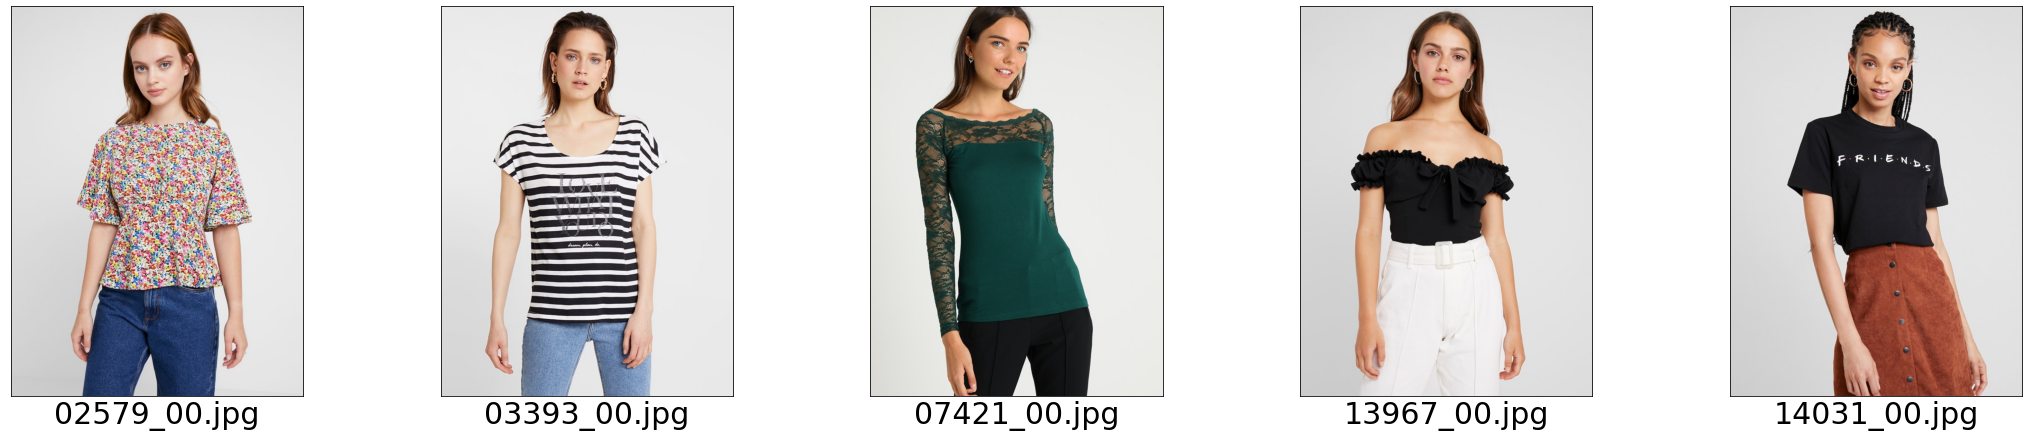

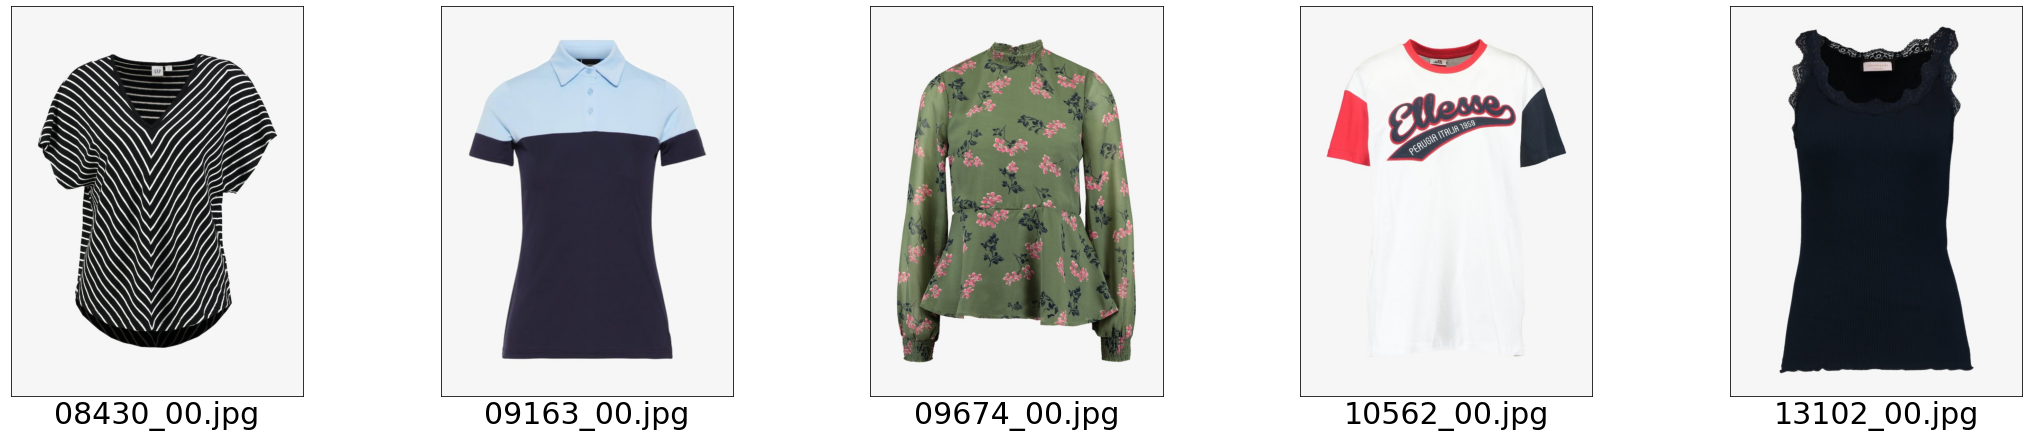

In [2]:
#@title #**人と衣服のランダム選択**
import glob
import random
import shutil
import os

# 乱数シード設定
seed_number =  120#@param {type:"integer"}
random.seed(seed_number)

# imageのランダム選択
reset_folder('image')
image_files = sorted(glob.glob('test/test/image/*.jpg'))
cnt = len(image_files)
num = random.sample(range(cnt),5)
image_names = []

for i in num:
  shutil.copy(image_files[i], 'image/'+os.path.basename(image_files[i]))
  image_names.append(image_files[i])
image_names.sort()
display_pic('image')


# clothのランダム選択
reset_folder('cloth')
cloth_files = sorted(glob.glob('test/test/cloth/*.jpg'))
cnt = len(cloth_files)
num = random.sample(range(cnt),5)
cloth_names =[]

for j in num:
  shutil.copy(cloth_files[j], 'cloth/'+os.path.basename(cloth_files[j]))
  cloth_names.append(cloth_files[j])
cloth_names.sort()
display_pic('cloth')


# txt作成
if os.path.isfile('test/test/test_pairs.txt'):
  os.remove('test/test/test_pairs.txt')

f = open('test/test/test_pairs.txt', 'w', encoding='UTF-8')
for image_name in image_names:
    for cloth_name in cloth_names:
        f.write(os.path.basename(image_name)+' ')
        f.write(os.path.basename(cloth_name)+'\n')
f.close()

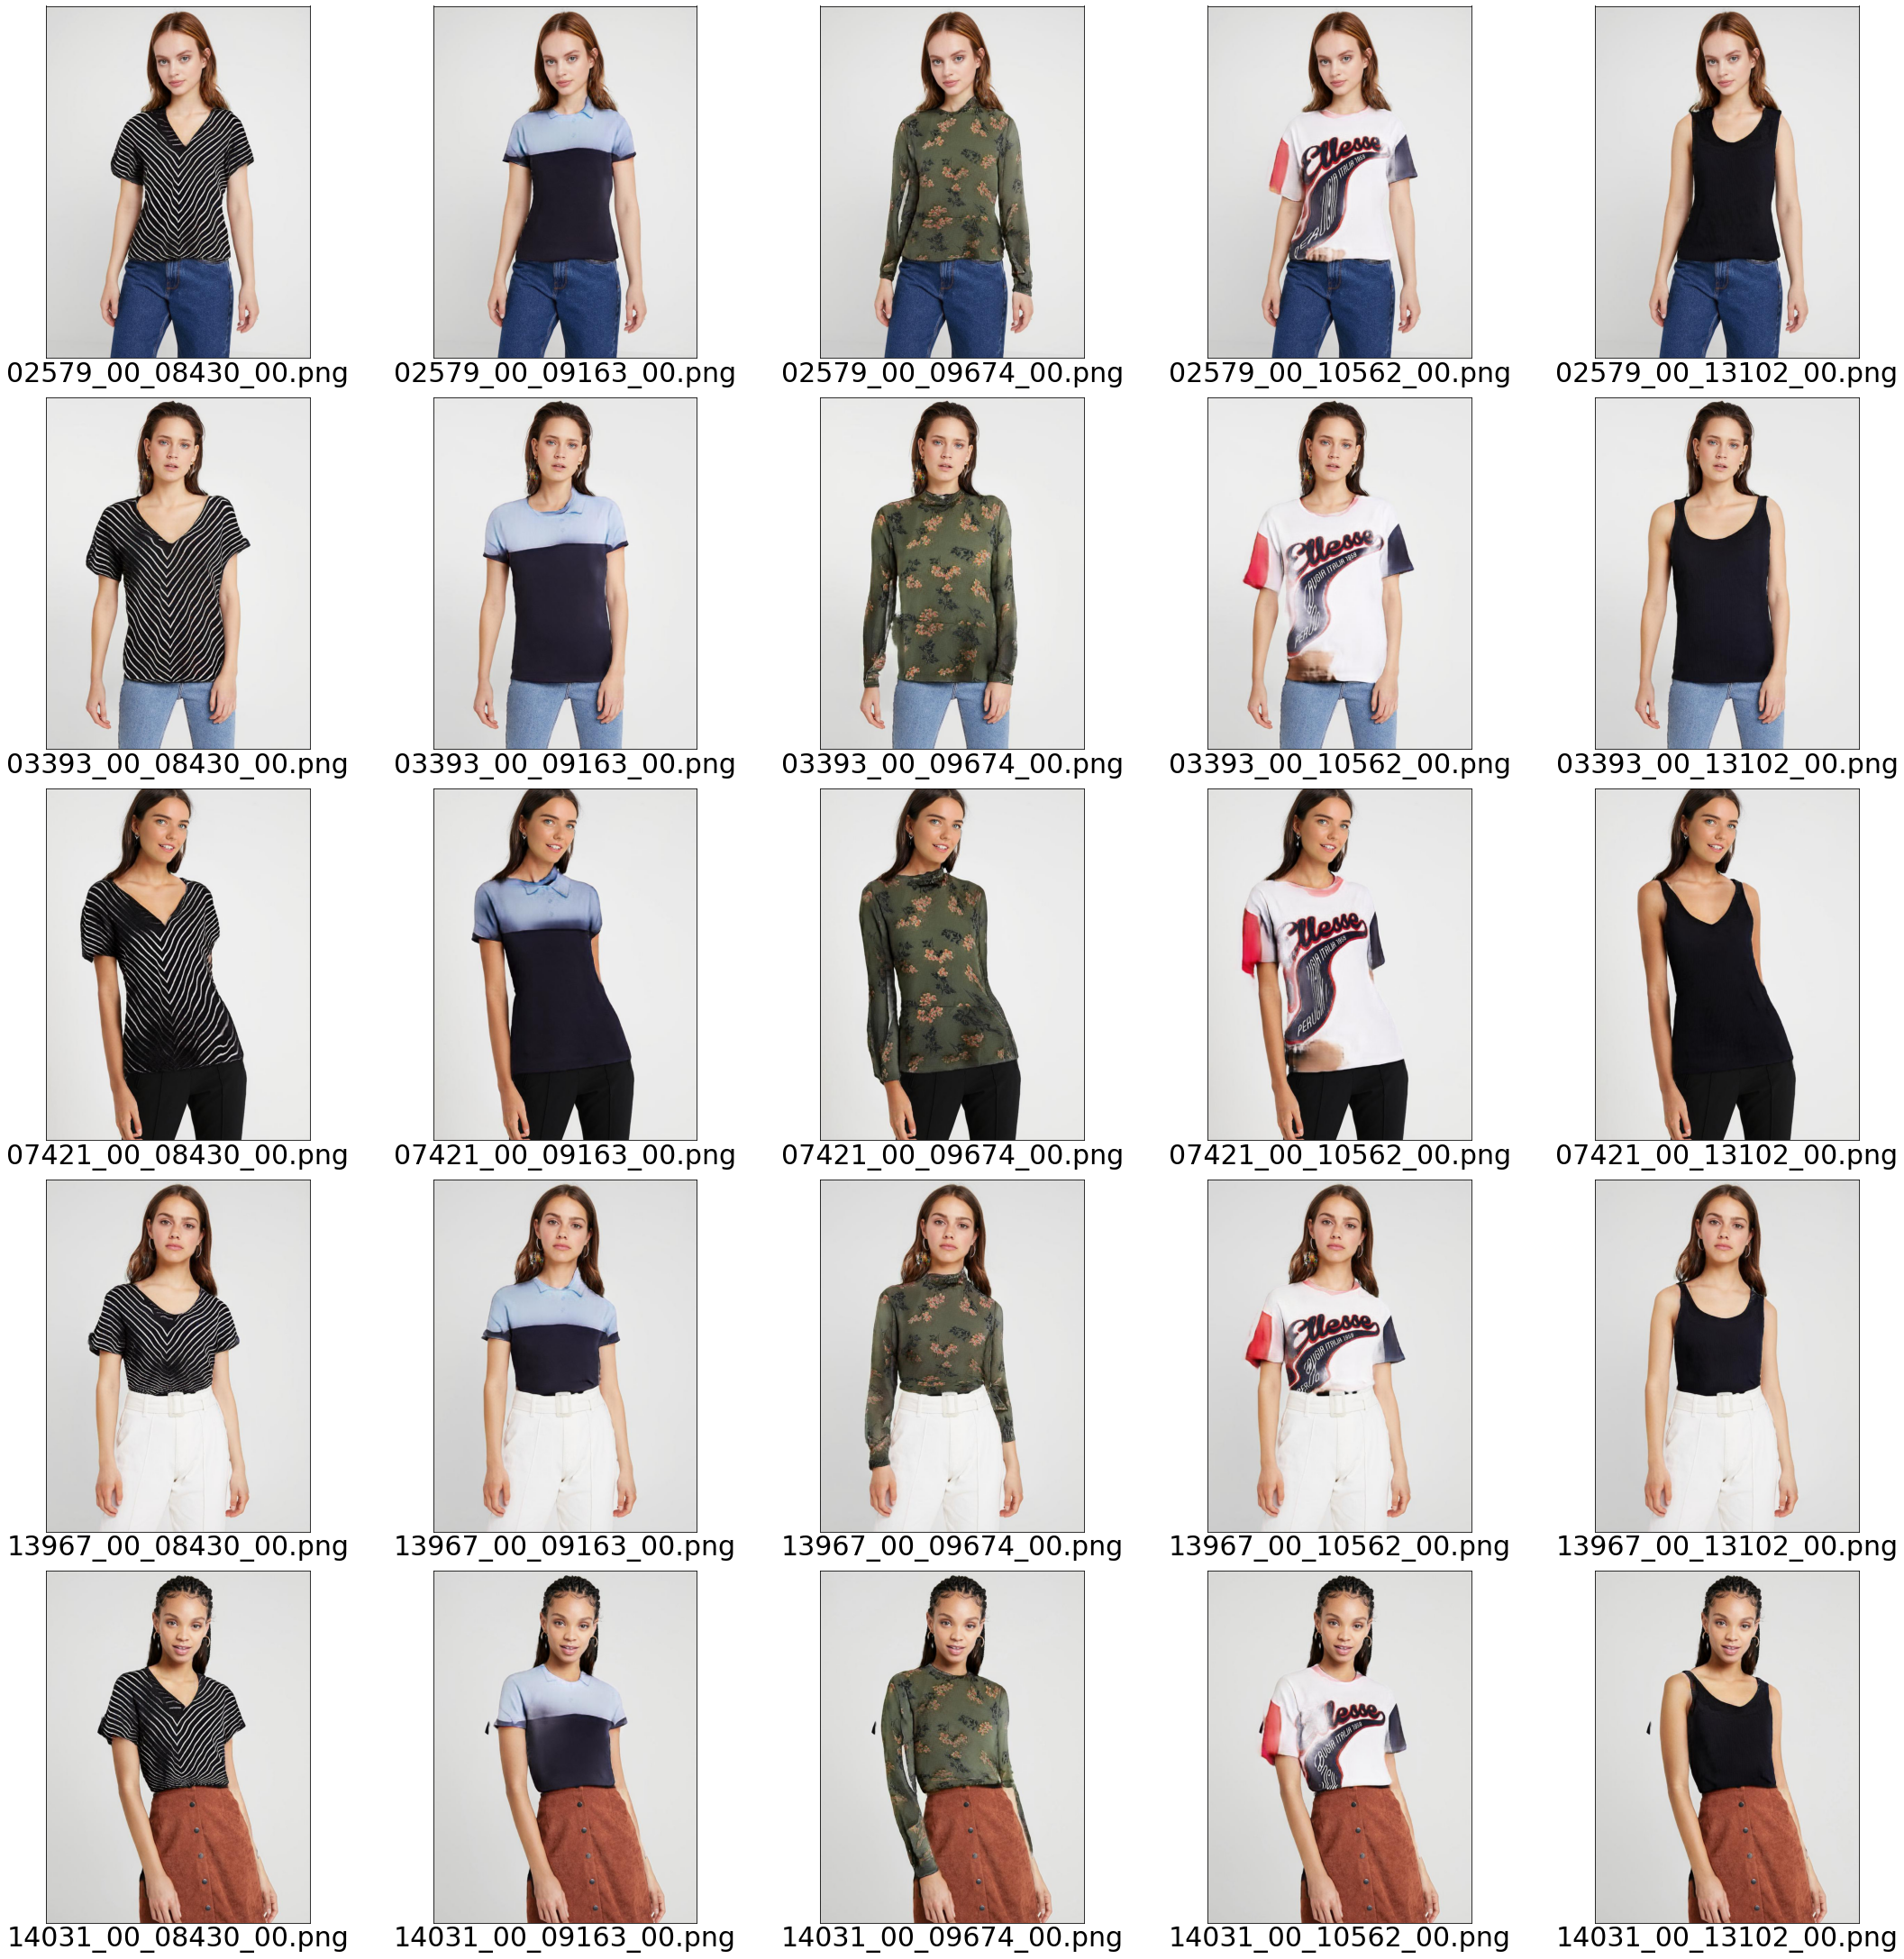

In [3]:
#@title #**仮想試着の実行**
reset_folder('output')

! python3 test_generator.py --occlusion --tocg_checkpoint './mtviton_step_100000.pth'\
                             --gpu_ids 0\
                             --gen_checkpoint './gen_step_110000.pth'\
                             --datasetting unpaired\
                             --dataroot './test'\
                             --data_list './test/test_pairs.txt'

clear_output()
display_pic_png('output/mtviton_step_100000.pth/test/unpaired/generator/output')

In [4]:
#@title #**動画の作成**

import cv2
import glob

reset_folder('movie1')
reset_folder('movie2')

result_files = sorted(glob.glob('output/mtviton_step_100000.pth/test/unpaired/generator/output/*.png'))
cnt = 0
black = cv2.imread('black.jpg')
for image_name in image_names:
   for cloth_name in cloth_names:
      left = cv2.imread(image_name)
      center = cv2.imread(cloth_name)
      right = cv2.imread(result_files[cnt])
      tmp = cv2.hconcat([left, center])
      img1 = cv2.hconcat([tmp, right])
      cv2.imwrite('movie1/'+str(cnt).zfill(4)+'.jpg', img1)

      up = cv2.hconcat([black, center])
      down = cv2.hconcat([left, right])
      img2 = cv2.vconcat([up, down])
      cv2.imwrite('movie2/'+str(cnt).zfill(4)+'.jpg', img2)
      cnt +=1

! ffmpeg -y -r 1 -i movie1/%04d.jpg -vcodec libx264 -pix_fmt yuv420p -loglevel error output1.mp4
! ffmpeg -y -r 1 -i movie2/%04d.jpg -vcodec libx264 -pix_fmt yuv420p -loglevel error output2.mp4
display_mp4('output1.mp4')

In [ ]:
#@title #**動画のダウンロード**

from google.colab import files

square = True #@param {type:"boolean"}
if square == True:
  shutil.copy('output2.mp4', 'download/'+str(seed_number)+'_s.mp4')
  files.download('download/'+str(seed_number)+'_s.mp4')
else:
  shutil.copy('output1.mp4', 'download/'+str(seed_number)+'.mp4')
  files.download('download/'+str(seed_number)+'.mp4')
